# Choosing a Schema Verifier Model

Models Tested:
  - Linear Regression
  - KNN
    - No Scaling
    - Standard Scaling
    - Robust Scaling
    - MinMaxScaling
    - GridSearchCV

Model Chosen: KNN with MinMaxScaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
schemas_path = "../data/schemas.txt"
# Create the dataframe
df = pd.read_csv(schemas_path, sep=";")
df.head()

,Type,Modulus,Size,Skip Values,Skip Type,Result
0,Stripes,3,97,10,original,1
1,Stripes,19,41,"2,3,4,5,6,7,8",original,1
2,Circles,14,16,"5,10,15",original,1
3,Circles,4,55,"1,2",original,0
4,Circles,11,11,"3,6,9,12,15,18",v2,1


In [3]:
df.shape

(2686, 6)

In [4]:
# Check the amount of Results are 0, 1, and 2
df.Result.value_counts()

1    1779
0     814
2      93
Name: Result, dtype: int64

In [5]:
# Get the types where the Results are 0, 1, and 2
empties = df.where(df.Result == 1).Type.value_counts()
fulls = df.where(df.Result == 2).Type.value_counts()
oks = df.where(df.Result == 0).Type.value_counts()

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

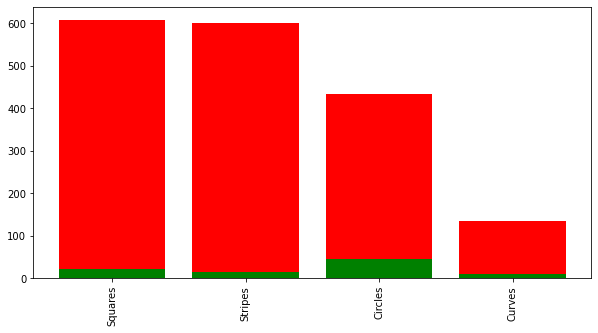

In [6]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(empties.index, empties.values, color="red")
plt.bar(fulls.index, fulls.values, color="green")
# plt.bar(oks.index, oks.values, color="blue")
plt.xticks(rotation=90)

Text(0.5, 1.0, 'OK schemas')

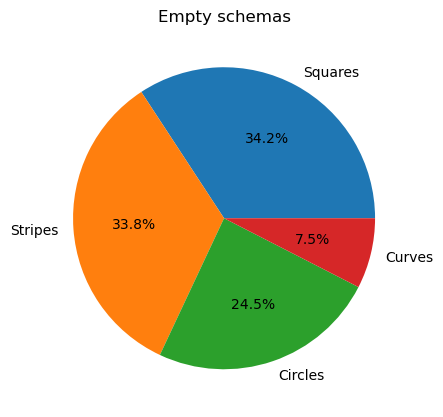

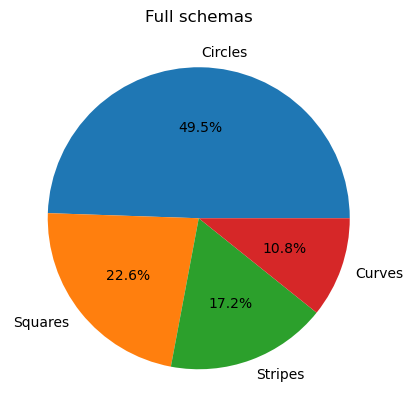

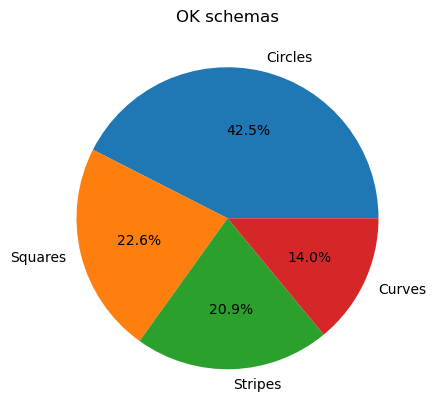

In [7]:
# Plot the results as a pie chart
# Make the text color white
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(empties.values, labels=empties.index, autopct="%1.1f%%")
plt.title("Empty schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(fulls.values, labels=fulls.index, autopct="%1.1f%%")
plt.title("Full schemas")
plt.figure(figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(oks.values, labels=oks.index, autopct="%1.1f%%")
plt.title("OK schemas")

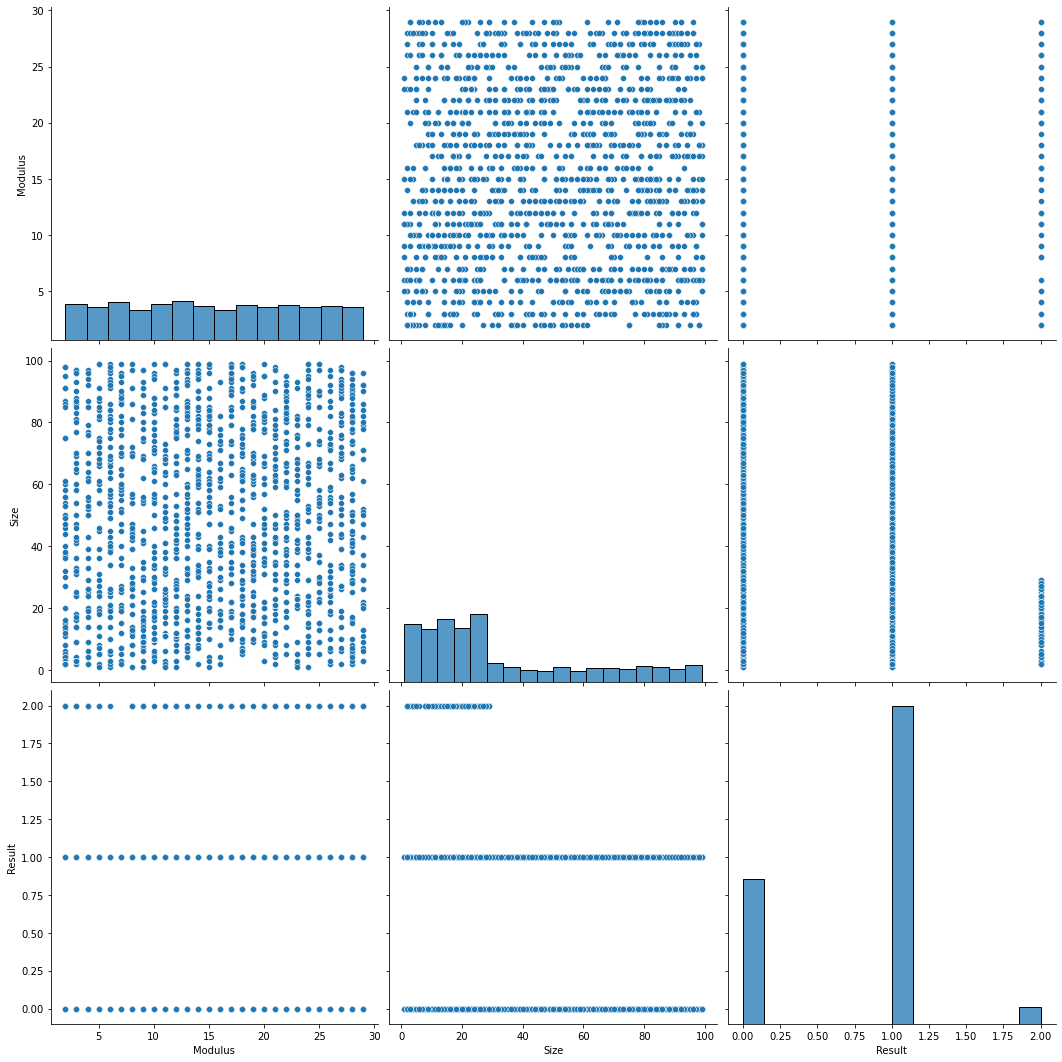

In [8]:
sns.pairplot(df, height=5)

In [9]:
# Convert the Type column to a dummy variable
df = pd.get_dummies(df, columns=["Type"])
df.head()

,Modulus,Size,Skip Values,Skip Type,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,3,97,10,original,1,0,0,0,1
1,19,41,"2,3,4,5,6,7,8",original,1,0,0,0,1
2,14,16,"5,10,15",original,1,1,0,0,0
3,4,55,"1,2",original,0,1,0,0,0
4,11,11,"3,6,9,12,15,18",v2,1,1,0,0,0


In [10]:
# Convert the Result column to a 1 or a 0
df.Result = df.Result.map({0: 1, 1: 0, 2: 0})

In [11]:
# sns.pairplot(df, height=2.5)

# Model

In [12]:
# Drop unnecessary columns
df = df.drop(columns=["Skip Type"], axis=1)
df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,3,97,10,0,0,0,0,1
1,19,41,"2,3,4,5,6,7,8",0,0,0,0,1
2,14,16,"5,10,15",0,1,0,0,0
3,4,55,"1,2",1,1,0,0,0
4,11,11,"3,6,9,12,15,18",0,1,0,0,0


In [13]:
# Find the starting number of the Skip Values
df["Skip Values"] = df["Skip Values"].map(lambda x: int(x.split(",")[0]))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [15]:
model = LinearRegression()
sclaer = MinMaxScaler()

In [16]:
linear_df = df.copy()
linear_df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,3,97,10,0,0,0,0,1
1,19,41,2,0,0,0,0,1
2,14,16,5,0,1,0,0,0
3,4,55,1,1,1,0,0,0
4,11,11,3,0,1,0,0,0


In [17]:
features = ["Modulus", "Size", "Skip Values"]

for feature in features:
    linear_df[feature] = sclaer.fit_transform(linear_df[feature].values.reshape(-1, 1))

linear_df.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.037037,0.979592,1.000000,0,0,0,0,1
1,0.629630,0.408163,0.111111,0,0,0,0,1
2,0.444444,0.153061,0.444444,0,1,0,0,0
3,0.074074,0.551020,0.000000,1,1,0,0,0
4,0.333333,0.102041,0.222222,0,1,0,0,0


In [18]:
# Split the data into training and testing sets
X = linear_df.drop(columns=["Result"], axis=1)
y = linear_df["Result"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2148, 7)
(538, 7)
(2148, 1)
(538, 1)


In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
print(model.coef_)
print(model.intercept_)

[[ 0.0925151   0.38541788 -0.05386919  0.08813942  0.10577273 -0.08834223
  -0.10556992]]
[0.16793195]


Text(0, 0.5, 'Result')

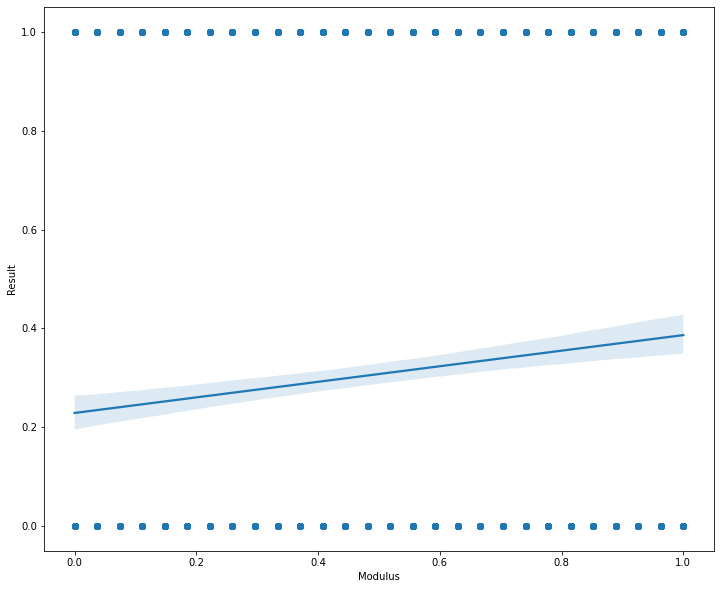

In [22]:
plt.figure(figsize=(12, 10))
sns.regplot(x=X_train.Modulus, y=y_train, data=df)
plt.xlabel("Modulus")
plt.ylabel("Result")

In [23]:
y_pred = model.predict(X_test)

In [24]:
# Score the model
print(model.score(X_test, y_test))

0.11519794225191826


# KNeighborsClassifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [26]:
df_no_scaling = df.copy()
df_standard_scaling = df.copy()
df_minmax_scaling = df.copy()
df_robust_scaling = df.copy()

In [27]:
# Split the data frame into training and test sets
X_train_no_scaling, X_test_no_scaling, y_train_no_scaling, y_test_no_scaling = train_test_split(df_no_scaling.drop("Result", axis=1), df_no_scaling.Result, test_size=0.2)

# No scaling

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_train_no_scaling, y_train_no_scaling)

KNeighborsClassifier(n_neighbors=3)

In [30]:
X_test_no_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
505,16,16,1,1,0,0,0
2337,29,29,1,0,0,1,0
719,23,23,2,0,0,1,0
456,23,34,2,0,1,0,0
867,5,54,10,0,0,0,1


In [31]:
# Predict the test set
y_pred_no_scaling = knn.predict(X_test_no_scaling)
print(y_pred_no_scaling)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [32]:
# Score the model
knn.score(X_test_no_scaling, y_test_no_scaling)

0.6617100371747212

# Standard Scaling

In [33]:
scaler = StandardScaler()

In [34]:
features = [["Modulus", "Size", "Skip Values"]]
for feature in features:
    df_standard_scaling[feature] = scaler.fit_transform(df_standard_scaling[feature])
df_standard_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,-1.530960,2.275773,1.989783,0,0,0,0,1
1,0.454151,0.266554,-0.613826,0,0,0,0,1
2,-0.166196,-0.630419,0.362528,0,1,0,0,0
3,-1.406890,0.768859,-0.939277,1,1,0,0,0
4,-0.538404,-0.809813,-0.288374,0,1,0,0,0


In [35]:
# Create the training and test sets
X_train_standard_scaling, X_test_standard_scaling, y_train_standard_scaling, y_test_standard_scaling = train_test_split(df_standard_scaling.drop("Result", axis=1), df_standard_scaling.Result, test_size=0.2, random_state=4)

In [36]:
X_train_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
1208,0.702290,-0.451024,-0.613826,0,0,0,1
682,1.694846,-0.163993,-0.613826,1,0,0,0
1109,-1.034682,1.307042,-0.613826,0,0,1,0
1620,0.826360,1.163527,-0.613826,0,0,0,1
542,1.570776,-0.199872,-0.939277,0,0,1,0


In [37]:
X_test_standard_scaling.head()

,Modulus,Size,Skip Values,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
262,0.950429,-0.379267,0.362528,1,0,0,0
2281,-1.158751,1.020011,1.989783,0,0,1,0
632,-0.786543,-0.881571,-0.613826,0,0,1,0
2526,-1.530960,2.275773,-0.613826,1,0,0,0
674,1.198568,-0.307509,-0.939277,1,0,0,0


In [38]:
knn = KNeighborsClassifier()

In [39]:
# Train
knn.fit(X_train_standard_scaling, y_train_standard_scaling)

KNeighborsClassifier()

In [40]:
# Predict
y_pred_standard_scaling = knn.predict(X_test_standard_scaling)
y_pred_standard_scaling

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [41]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_standard_scaling, y_pred_standard_scaling))
print(knn.score(X_test_standard_scaling, y_test_standard_scaling))
print(roc_auc_score(y_test_standard_scaling, y_pred_standard_scaling))

0.7676579925650557
0.7676579925650557
0.6678261601954012


# Robust Scaling

In [42]:
scaler = RobustScaler()
knn = KNeighborsClassifier()

In [43]:
for feature in features:
    df_robust_scaling[feature] = scaler.fit_transform(df_robust_scaling[feature])
df_robust_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,-0.857143,1.825,2.333333,0,0,0,0,1
1,0.285714,0.425,-0.333333,0,0,0,0,1
2,-0.071429,-0.200,0.666667,0,1,0,0,0
3,-0.785714,0.775,-0.666667,1,1,0,0,0
4,-0.285714,-0.325,0.000000,0,1,0,0,0


In [44]:
# Create the training and test sets
X_train_robust_scaling, X_test_robust_scaling, y_train_robust_scaling, y_test_robust_scaling = train_test_split(df_robust_scaling.drop("Result", axis=1), df_robust_scaling.Result, test_size=0.2, random_state=4)

In [45]:
# Train
knn.fit(X_train_robust_scaling, y_train_robust_scaling)

KNeighborsClassifier()

In [46]:
y_pred_robust_scaling = knn.predict(X_test_robust_scaling)
print(y_pred_robust_scaling)

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 

In [47]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_robust_scaling, y_pred_robust_scaling))
print(knn.score(X_test_robust_scaling, y_test_robust_scaling))
print(roc_auc_score(y_test_robust_scaling, y_pred_robust_scaling))

0.7565055762081785
0.7565055762081785
0.6523119683315085


# MinMaxScaling

In [48]:
scaler = MinMaxScaler()
knn = KNeighborsClassifier()

In [49]:
for feature in features:
    df_minmax_scaling[feature] = scaler.fit_transform(df_minmax_scaling[feature])
df_minmax_scaling.head()

,Modulus,Size,Skip Values,Result,Type_Circles,Type_Curves,Type_Squares,Type_Stripes
0,0.037037,0.979592,1.000000,0,0,0,0,1
1,0.629630,0.408163,0.111111,0,0,0,0,1
2,0.444444,0.153061,0.444444,0,1,0,0,0
3,0.074074,0.551020,0.000000,1,1,0,0,0
4,0.333333,0.102041,0.222222,0,1,0,0,0


In [50]:
# Create the training and test sets
X_train_minmax_scaling, X_test_minmax_scaling, y_train_minmax_scaling, y_test_minmax_scaling = train_test_split(df_minmax_scaling.drop("Result", axis=1), df_minmax_scaling.Result, test_size=0.2, random_state=4)

In [51]:
# Train
knn.fit(X_train_minmax_scaling, y_train_minmax_scaling)

KNeighborsClassifier()

In [52]:
y_pred_minmax_scaling = knn.predict(X_test_minmax_scaling)
print(y_pred_minmax_scaling)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 0 

In [53]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test_minmax_scaling, y_pred_minmax_scaling))
print(knn.score(X_test_minmax_scaling, y_pred_minmax_scaling))
print(roc_auc_score(y_test_minmax_scaling, y_pred_minmax_scaling))

0.758364312267658
1.0
0.6651393918975829


# GridSearchCV

In [54]:
knn = KNeighborsClassifier()
# List Hyperparameters to tune
leaf_size = list(range(1, 50))
n_neighbors = list(range(1, 30))
p =[1, 2]

In [55]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [56]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Result", axis=1), df.Result, test_size=0.2, random_state=4)

In [57]:
# # Make model
# clf = GridSearchCV(knn, hyperparameters, cv=10)
# best_model = clf.fit(X_train, y_train)

In [58]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

NameError: name 'best_model' is not defined

In [ ]:
# Predict test set
y_pred = best_model.predict(X_test)

In [ ]:
# Check accuracy, score, and roc_auc_score
print(accuracy_score(y_test, y_pred))
print(best_model.score(X_test, y_test))
print(roc_auc_score(y_test, y_pred))

0.6802030456852792
0.6802030456852792
0.6945892410341952
